# **Prétraitement des données :**




1. **Monter Google Drive dans Google Colab**

---

In [20]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/My Drive/datte'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. **Importation des Bibliothèques**

---


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

3. **Extraction des Matrices à partir des Images**
---


In [22]:
X = []
y = []

In [23]:
CATEGORIES = ['Medjool', 'Shaishe', 'Sokari', 'Nabtat Ali', 'Rutab', 'Meneifi', 'Sugaey','Galaxy','Ajwa']


for foldername in os.listdir(data_dir):
    label = foldername
    class_folder_path = os.path.join(data_dir, foldername)
    image_filenames = os.listdir(class_folder_path)
    for filename in image_filenames:
        image = cv2.imread(os.path.join(class_folder_path, filename))
        if image is None:
            print(f"Erreur: Impossible de charger l'image '{filename}'.")
            continue
        resized_image = cv2.resize(image, (224, 224))
        image_array = np.array(resized_image)
        X.append(image_array)
        y.append(CATEGORIES.index(label))


**Transformation des Données d'Images en Arrays NumPy**



In [24]:
X = np.array(X)
y = np.array(y)

# **Analyse de donnée :**




**Verfication des valeurs manquants**

In [25]:
Xa = X.reshape((X.shape[0], -1))

df_X = pd.DataFrame(Xa)
df_y = pd.DataFrame(y)


missing_values_X = df_X.isnull().sum()
missing_values_y = df_y.isnull().sum()

print("Les valeurs manquants en X :")
print(missing_values_X)

print("\nLes valeurs manquants en y :")
print(missing_values_y)


Les valeurs manquants en X :
0         0
1         0
2         0
3         0
4         0
         ..
150523    0
150524    0
150525    0
150526    0
150527    0
Length: 150528, dtype: int64

Les valeurs manquants en y :
0    0
dtype: int64


In [26]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (1658, 224, 224, 3)
y shape: (1658,)


**Normalisation :**

In [27]:
X = X / 255.0


In [28]:
y

array([0, 0, 0, ..., 7, 7, 7])

**Partitionnement du Dataset en ensembles d'Entraînement et de Test**


---



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1326, 224, 224, 3)
X_test shape: (332, 224, 224, 3)
y_train shape: (1326,)
y_test shape: (332,)



# **Définition et Compilation du Modèle CNN**


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=2)
]



In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [33]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_split=0.2,
                    batch_size=22,
                    callbacks=callbacks)


Epoch 1/30
49/49 [==============================] - 182s 4s/step - loss: 3.1186 - accuracy: 0.1868 - val_loss: 1.7058 - val_accuracy: 0.3459 - lr: 0.0010
Epoch 2/30
49/49 [==============================] - 183s 4s/step - loss: 1.6852 - accuracy: 0.3679 - val_loss: 1.2444 - val_accuracy: 0.6353 - lr: 0.0010
Epoch 3/30
49/49 [==============================] - 173s 4s/step - loss: 1.2827 - accuracy: 0.5198 - val_loss: 0.9427 - val_accuracy: 0.7180 - lr: 0.0010
Epoch 4/30
49/49 [==============================] - 178s 4s/step - loss: 1.3122 - accuracy: 0.5519 - val_loss: 1.1587 - val_accuracy: 0.6203 - lr: 0.0010
Epoch 5/30
49/49 [==============================] - 179s 4s/step - loss: 1.1331 - accuracy: 0.5802 - val_loss: 0.7728 - val_accuracy: 0.7256 - lr: 0.0010
Epoch 6/30
49/49 [==============================] - 186s 4s/step - loss: 0.8926 - accuracy: 0.6774 - val_loss: 0.6839 - val_accuracy: 0.7744 - lr: 0.0010
Epoch 7/30
49/49 [==============================] - 180s 4s/step - loss: 0.8

# **Evaluation du model**


In [34]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test loss: {loss:.2f}")
print(f"Test accuracy: {accuracy:.2f}")


11/11 - 16s - loss: 0.3259 - accuracy: 0.9127 - 16s/epoch - 1s/step
Test loss: 0.33
Test accuracy: 0.91


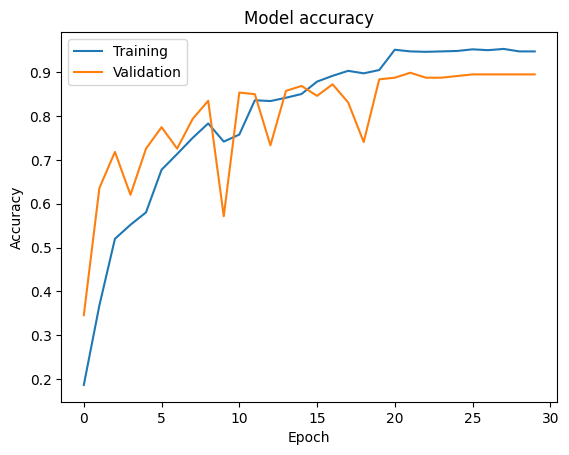

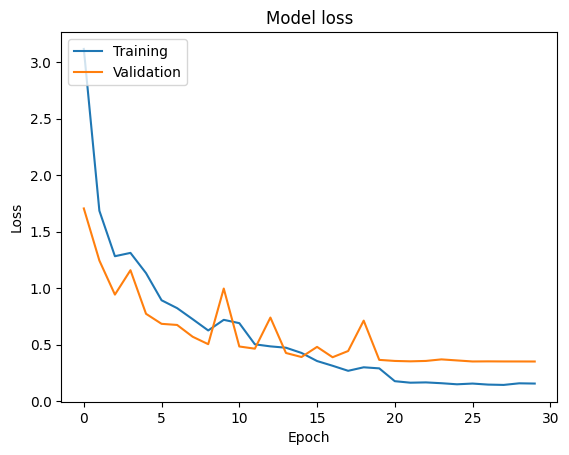

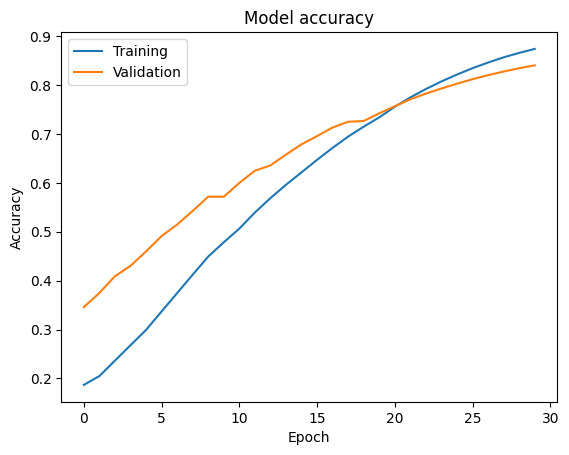

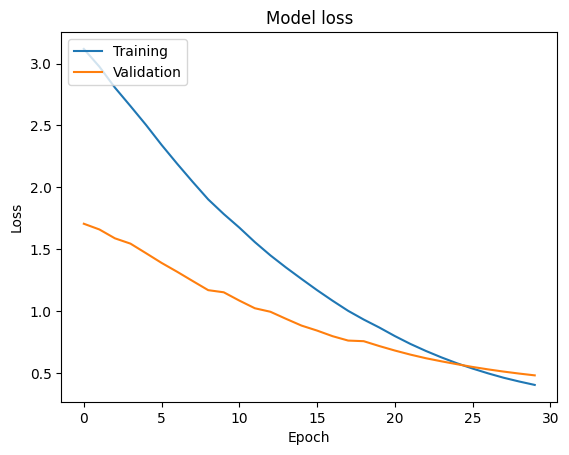

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

11/11 [==============================] - 14s 1s/step


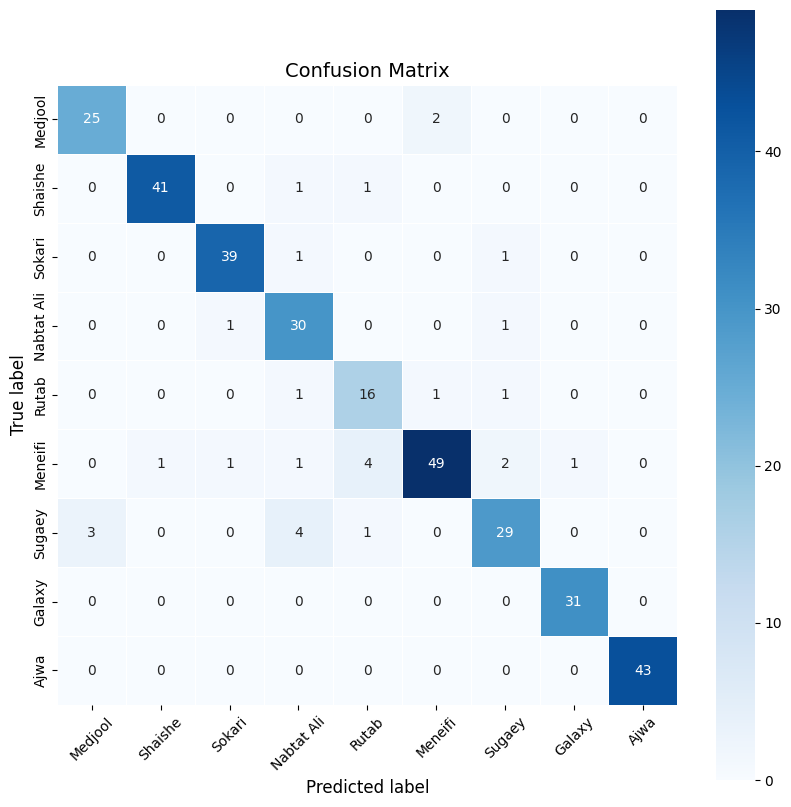

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues")

ax.set_xlabel("Predicted label", fontsize=12)
ax.set_ylabel("True label", fontsize=12)
ax.set_title("Confusion Matrix", fontsize=14)
ax.xaxis.set_ticklabels(CATEGORIES)
ax.yaxis.set_ticklabels(CATEGORIES)

plt.xticks(rotation=45)

plt.show()


In [37]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred, target_names=CATEGORIES)

print(report)


11/11 [==============================] - 14s 1s/step
              precision    recall  f1-score   support

     Medjool       0.89      0.93      0.91        27
     Shaishe       0.98      0.95      0.96        43
      Sokari       0.95      0.95      0.95        41
  Nabtat Ali       0.79      0.94      0.86        32
       Rutab       0.73      0.84      0.78        19
     Meneifi       0.94      0.83      0.88        59
      Sugaey       0.85      0.78      0.82        37
      Galaxy       0.97      1.00      0.98        31
        Ajwa       1.00      1.00      1.00        43

    accuracy                           0.91       332
   macro avg       0.90      0.91      0.91       332
weighted avg       0.92      0.91      0.91       332

